# Part 1

## Preprocessing the Database

In [145]:
!pip install pandas
!pip install scikit-learn
!pip install matplotlib
!pip install seaborn
!pip install mlxtend

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 4.0 MB/s eta 0:00:00m eta 0:00:010:00:01


In [134]:
import pandas as pd
import os

# Titanic Dataset Overview

The file `train.csv` contains data about Titanic passengers, including victims and survivors.

This dataset is commonly used for binary classification tasks, such as predicting survival outcomes based on features like age, sex, class, and more.

In [135]:
def importData(pathName, fileName):
    try:
        full_path = os.path.join(os.getcwd(), pathName, fileName)
        
        df = pd.read_csv(full_path)
        return df
    
    except FileNotFoundError:
        print(f"The file not found: {fileName}")
    except pd.errors.EmptyDataError:
        print("The file is empty.")
    except Exception as e:
        print(f"An error has occurred to import the data: {e}")

In [136]:
def printDataFrame(df):
    try:
        print("DF INFO")
        df.info()
        print("============================================")    

        print("DF HEAD")
        print(df.head().to_string())
        print("============================================")  
        
        print("DF TAIL")
        print(df.tail().to_string())
        print("============================================")    

        print("DF DESCRIPTION")
        df.describe()
        print("============================================")    

        print("COUNT NULL VALUES")
        print(df.isnull().sum())
        print("============================================")    

    except Exception as e:
        print("An error has occurred")
        print(str(e))

In [137]:
df_titanicData = importData("titanic", "train.csv")

# Printing DataFrame information, head, tail, null values...
printDataFrame(df_titanicData)

DF INFO
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
DF HEAD
   PassengerId  Survived  Pclass                                                 Name     Sex   Age  SibSp  Parch            Ticket     Fare Cabin Embarked
0            1         0       3                              Braund, Mr

Analyzing the informations, was discovered 3 columns 

In the database, the columns Age, Cabin, and Embarked have nullable values.
The next step is to replace the nullable values with valid values and to replace categorics values with label enconding or one-hot enconding
Example:
Sex (Male = 0, Female = 1)

In [138]:
df_processed = df_titanicData

df_processed['Age'] = df_processed['Age'].fillna(df_processed['Age'].median()) # Fill null ages with the median
df_processed['Embarked'] = df_processed['Embarked'].fillna(df_processed['Embarked'].mode()[0]) # Fill null Embarked with the mode

df_processed['FamilySize'] = df_processed['SibSp'] + df_processed['Parch'] + 1
df_processed.drop(['SibSp', 'Parch'], axis=1,inplace = True)

df_processed['HasCabin'] = df_processed['Cabin'].apply(lambda x: 0 if type(x) == float else 1)
df_processed.drop('Cabin', axis=1, inplace=True)

df_processed['Sex'] = df_processed['Sex'].map({'male': 0, 'female': 1})

df_processed = pd.get_dummies(df_processed, columns=['Embarked'], prefix='Embarked', drop_first=True)
df_titanicData = pd.get_dummies(df_titanicData, columns=['Embarked'], prefix='Embarked', drop_first=True)


# Part 2  
## Using Two Supervised Classification Algorithms

In this section, we apply two popular supervised classification algorithms to the Titanic dataset:

### 🔍 Algorithms Used:
- **Random Forest**  
  An ensemble method that builds multiple decision trees and merges their results to improve accuracy and control overfitting.

- **Naive Bayes**  
  A probabilistic classifier based on Bayes' theorem, assuming independence between features.

These models are trained using the `train.csv` file, which contains data about Titanic passengers, including both victims and survivors.


# Random Forest

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

In [139]:
X = df_processed.drop(['Survived', 'Name', 'Ticket'], axis = 1) # All columns except "Survived", "Name" and "Ticket"
y = df_processed['Survived'] # Just Survived column

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) 

rf_model = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')

# Traning the Model

print("Training the random forest model")
rf_model.fit(X_train, y_train)
print("finishing training")

y_pred_rf = rf_model.predict(X_test)

print("\n---Random Forest avaliation---")
print(f"Acuracy: {accuracy_score(y_test, y_pred_rf):.4f}")
print(f"Precicion: {precision_score(y_test, y_pred_rf):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_rf):.4f}")
print(f"F1-Score: {f1_score(y_test, y_pred_rf):.4f}")

print("\nClassification Relatory (Random Forest):")
print(classification_report(y_test, y_pred_rf))

Training the random forest model
finishing training

---Random Forest avaliation---
Acuracy: 0.8547
Precicion: 0.8636
Recall: 0.7703
F1-Score: 0.8143

Classification Relatory (Random Forest):
              precision    recall  f1-score   support

           0       0.85      0.91      0.88       105
           1       0.86      0.77      0.81        74

    accuracy                           0.85       179
   macro avg       0.86      0.84      0.85       179
weighted avg       0.86      0.85      0.85       179



# Naive Bayes

In [140]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report


In [141]:
nb_model = GaussianNB()

print("\nTraining Naive Bayes...")
nb_model.fit(X_train, y_train)
print("Tha model was trained.")

y_pred_nb = nb_model.predict(X_test)

print("\n--- Evaluation of Naive Bayes (Gaussian) ---")
print(f"Precision: {precision_score(y_test, y_pred_nb):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_nb):.4f}")
print(f"F1-Score: {f1_score(y_test, y_pred_nb):.4f}")

print("\nClassification Relatory (Naive Bayes):")
print(classification_report(y_test, y_pred_nb))


Training Naive Bayes...
Tha model was trained.

--- Evaluation of Naive Bayes (Gaussian) ---
Precision: 0.7407
Recall: 0.8108
F1-Score: 0.7742

Classification Relatory (Naive Bayes):
              precision    recall  f1-score   support

           0       0.86      0.80      0.83       105
           1       0.74      0.81      0.77        74

    accuracy                           0.80       179
   macro avg       0.80      0.81      0.80       179
weighted avg       0.81      0.80      0.81       179



# Part 3

## Applying Clustering Algorithms

### K-means Clustering

In this section, we use the K-means algorithm, a popular unsupervised learning method, to group the data into clusters based on feature similarities. This technique helps identify natural groupings within the dataset without relying on predefined labels.


In [142]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns


Training the K-Means model with k=4...
Clustering has finished.


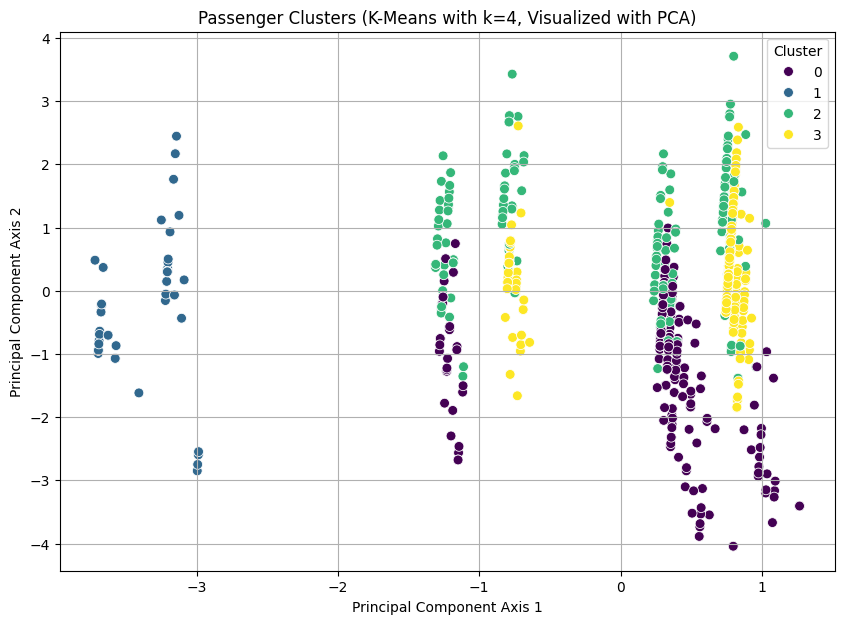


Average features per cluster:
              Sex        Age  FamilySize  HasCabin  Embarked_Q  Embarked_S
Cluster                                                                   
0        0.886792  23.806604    3.231132  0.028302         0.0    0.830189
1        0.467532  28.032468    1.597403  0.051948         1.0    0.000000
2        0.458763  35.857835    1.798969  1.000000         0.0    0.644330
3        0.002451  29.409926    1.323529  0.000000         0.0    0.845588

Survival Rate per Cluster:
Cluster
0    0.580189
1    0.389610
2    0.664948
3    0.147059
Name: Survived, dtype: float64

Distribution of Sex (original) per Cluster:
Sex        0    1
Cluster          
0         24  188
1         41   36
2        105   89
3        407    1

Distribution of Pclass (original) per Cluster:
Pclass     1    2    3
Cluster               
0         17   66  129
1          2    3   72
2        170   14   10
3         27  101  280


In [144]:
features_for_clustering = ['Sex', 'Age', 'FamilySize', 'HasCabin', 'Embarked_Q', 'Embarked_S'] 

X_cluster = df_processed[features_for_clustering].copy()

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_cluster)

k = 4
kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')

print(f"\nTraining the K-Means model with k={k}...")
cluster_labels = kmeans.fit_predict(X_scaled)
print("Clustering has finished.")

df_analysis = df_titanicData.copy()
df_analysis['Cluster'] = cluster_labels

pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_scaled)

df_pca = pd.DataFrame(data=X_pca, columns=['PCA1', 'PCA2'])
df_pca['Cluster'] = cluster_labels

plt.figure(figsize=(10, 7))
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', data=df_pca, palette='viridis', s=50) 
plt.title(f'Passenger Clusters (K-Means with k={k}, Visualized with PCA)')
plt.xlabel('Principal Component Axis 1')
plt.ylabel('Principal Component Axis 2')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

cluster_summary_mean = df_analysis.groupby('Cluster')[features_for_clustering].mean()

print("\nAverage features per cluster:")
print(cluster_summary_mean)

print("\nSurvival Rate per Cluster:")
print(df_analysis.groupby('Cluster')['Survived'].mean())  # Mean of 'Survived' (0 or 1) = survival rate

print("\nDistribution of Sex (original) per Cluster:")
print(pd.crosstab(df_analysis['Cluster'], df_titanicData['Sex']))  # Use df_original for 'Sex' if it was encoded in df_analysis

print("\nDistribution of Pclass (original) per Cluster:")
print(pd.crosstab(df_analysis['Cluster'], df_titanicData['Pclass']))


# Part 4  
## Association Rule Mining

### Applying the Apriori Algorithm

In this section, we explore frequent itemsets and extract association rules using the **Apriori** algorithm. This technique is commonly used in market basket analysis to uncover relationships between items or features within the dataset.


In [147]:
from mlxtend.frequent_patterns import apriori, association_rules


In [149]:
df_rules = df_titanicData.copy()  # Or use df_processed if you prefer to start from that

# a. Discretize numerical variables (Age, Fare)
# Age
bins_age = [0, 12, 18, 35, 60, 100]
labels_age = ['Age_Child', 'Age_Teen', 'Age_YoungAdult', 'Age_Adult', 'Age_Senior']
df_rules['Age_Group'] = pd.cut(df_rules['Age'], bins=bins_age, labels=labels_age, right=False)

# Fare - Example with 4 ranges based on quartiles
try:
    df_rules['Fare_Group'] = pd.qcut(df_rules['Fare'], q=4, labels=['Fare_Low', 'Fare_Medium', 'Fare_High', 'Fare_VeryHigh'])
except ValueError:  # In case of duplicate values in quantiles, a fallback method
    df_rules['Fare_Group'] = pd.cut(df_rules['Fare'], bins=4, labels=['Fare_Low', 'Fare_Medium', 'Fare_High', 'Fare_VeryHigh'])

# b. Convert relevant variables into "item" format (string)
# Pclass
df_rules['Pclass'] = 'Pclass_' + df_rules['Pclass'].astype(str)

# Sex
df_rules['Sex'] = df_rules['Sex'].apply(lambda x: 'Sex_Female' if x == 'female' else 'Sex_Male')  # Adjust if already encoded as 0/1

# Survived
df_rules['Survived_Rule'] = df_rules['Survived'].apply(lambda x: 'Survived_Yes' if x == 1 else 'Survived_No')

# Other custom features you may have created (e.g., FamilySize, IsAlone, Title)
# FamilySize (Example of discretization)
bins_family = [1, 2, 4, 12]  # Alone, Small, Medium/Large
labels_family = ['Family_Alone', 'Family_Small', 'Family_Large']
df_rules['FamilySize_Group'] = pd.cut(df_rules['FamilySize'], bins=bins_family, labels=labels_family, right=False)
df_rules['FamilySize_Group'].fillna('Family_Alone')  # Fill NaNs for FamilySize=1 (if right=False)

# c. Select the columns to be transformed into items
# Include original categorical columns and the new group-based columns
cols_for_rules = ['Pclass', 'Sex', 'Age_Group', 'Fare_Group', 'Survived_Rule', 'FamilySize_Group']
# Add more columns if needed, such as 'Embarked' (must be formatted like 'Embarked_S', etc.)

df_rules_subset = df_rules[cols_for_rules].copy()

# d. Remove rows with NaNs from discretization (if any)
df_rules_subset.dropna(inplace=True)

# e. Transform the DataFrame into One-Hot Encoding format (each column is an item)
df_encoded_rules = pd.get_dummies(df_rules_subset)

# Preview the first rows of the encoded DataFrame
print("DataFrame ready for Apriori (first rows):")
print(df_encoded_rules.head())

# a. Find frequent itemsets
# min_support defines the minimum frequency for an itemset to be considered "frequent"
# The value of min_support (between 0 and 1) needs to be tuned;
# start with a low value and increase if too many rules are generated, or decrease if too few.
frequent_itemsets = apriori(df_encoded_rules, min_support=0.01, use_colnames=True)

print("\nFrequent Itemsets (example):")
print(frequent_itemsets.sort_values(by='support', ascending=False).head())

# b. Generate association rules
# You can filter by 'confidence' or 'lift'
# min_threshold is the minimum value for the chosen metric
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1.2)
# Alternatively, use metric="confidence", min_threshold=0.5 (as an example)

# Sort the rules by lift or confidence to see the strongest or most interesting ones
rules_sorted = rules.sort_values(by=['lift', 'confidence'], ascending=[False, False])

print("\nGenerated Association Rules (top 5 example):")
print(rules_sorted.head())

# Display relevant columns for interpretation
pd.set_option('display.max_colwidth', None)  # To see full itemsets without truncation
print("\nTop Rules for Interpretation:")
print(rules_sorted[['antecedents', 'consequents', 'support', 'confidence', 'lift']].head(10))  # Show top 10 rules for review


DataFrame ready for Apriori (first rows):
   Pclass_Pclass_1  Pclass_Pclass_2  Pclass_Pclass_3  Sex_Sex_Male  \
0            False            False             True          True   
1             True            False            False          True   
2            False            False             True          True   
3             True            False            False          True   
4            False            False             True          True   

   Age_Group_Age_Child  Age_Group_Age_Teen  Age_Group_Age_YoungAdult  \
0                False               False                      True   
1                False               False                     False   
2                False               False                      True   
3                False               False                     False   
4                False               False                     False   

   Age_Group_Age_Adult  Age_Group_Age_Senior  Fare_Group_Fare_Low  \
0                False             